In [45]:
#Bai tap 1
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def get_column(data,index):
  nums_column = len(data[0])
  nums_row = len(data)
  if index >= nums_column or index < 0:
    print('Index out of range')
    return -1
  result = [data[i][index] for i in range(0,nums_row)]
  return result

def prepare_data(file_name_dataset):
  data = np.genfromtxt(file_name_dataset,delimiter=',',skip_header=1).tolist()
  N = len(data)
  tv_data = get_column(data,0)
  radio_data = get_column(data,1)
  newspaper_data = get_column(data,2)
  sales_data = get_column(data,3)
  X = [tv_data,radio_data,newspaper_data]
  y = sales_data
  return X,y


X,y = prepare_data('/content/advertising.csv')
list = [sum(X[0][:5]),sum(X[1][:5]),sum(X[2][:5]),sum(y[:5])]
list

[624.1, 175.10000000000002, 300.5, 78.9]

In [39]:
type(y)

float

In [49]:
#Bai tap 2
def initialize_params():
  w1,w2,w3,b = (0.016992259082509283,0.0070783670518262355, -0.002307860847821344 , 0)
  return w1,w2,w3,b

def predict(x1,x2,x3,w1,w2,w3,b):
  return w1*x1+w2*x2+w3*x3 + b

def compute_loss(y,y_hat):
  return (y-y_hat)**2

def compute_gradient(xi,y,y_hat):
  return 2*(y_hat-y)*xi

def compute_gradient_b(y,y_hat):
  return 2*(y_hat-y)

def update_weight_wi(wi,dl_dwi,lr):
  wi = wi - lr*dl_dwi
  return wi

def update_weight_b(b,dl_db,lr):
  b = b - lr*dl_db
  return b

def implement_linear_regression(X_data,y_data,epoch_max=50,lr =1e-5):
  losses = []
  w1,w2,w3,b = initialize_params()
  N = len(y_data)
  for epoch in range(epoch_max):
    for i in range(N):
      x1 = X_data[0][i]
      x2 = X_data[1][i]
      x3 = X_data[2][i]

      y_hat = predict(x1,x2,x3,w1,w2,w3,b)
      loss = compute_loss(y_data[i],y_hat)
      losses.append(loss)

      dl_dw1 = compute_gradient(x1,y_data[i],y_hat)
      dl_dw2 = compute_gradient(x2,y_data[i],y_hat)
      dl_dw3 = compute_gradient(x3,y_data[i],y_hat)
      dl_db = compute_gradient_b(y_data[i],y_hat)

      w1 = update_weight_wi(w1,dl_dw1,lr)
      w2 = update_weight_wi(w2,dl_dw2,lr)
      w3 = update_weight_wi(w3,dl_dw3,lr)
      b = update_weight_b(b,dl_db,lr)
  return (w1,w2,w3,b,losses)

In [37]:
#trac nghiem
#q2-trac nghiem
y = predict(1,1,1,0,0.5,0,0.5)
print(f'dap an cau 2 : {y}')

#q3-trac nghiem
l = compute_loss(1,0.5)
print(f'dap an cau 3 : {l}')

#q4-trac nghiem
g_wi = compute_gradient(1,1,0.5)
print(f'dap an cau 4 : {g_wi}')

#q5-trac nghiem
g_b = compute_gradient_b(2,0.5)
print(f'dap an cau 5 : {g_b}')

#q6-trac nghiem
after_wi = update_weight_wi(1,-0.5,1e-5)
print(f'dap an cau 6 : {after_wi}')

#q7-trac nghiem
after_b = update_weight_b(0.5,-1,1e-5)
print(f'dap an cau 7 : {after_b}')

dap an cau 2 : 1.0
dap an cau 3 : 0.25
dap an cau 4 : -1.0
dap an cau 5 : -3.0
dap an cau 6 : 1.000005
dap an cau 7 : 0.50001


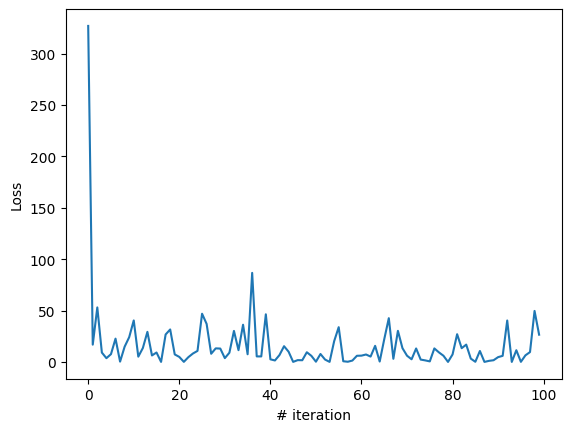

In [50]:
X,y = prepare_data('/content/advertising.csv')
(w1, w2, w3, b, losses) = implement_linear_regression(X, y)
plt.plot(losses[:100])
plt.xlabel("# iteration")
plt.ylabel("Loss")
plt.show()


In [51]:
#trac nghiem - cau 8
print(w1, w2, w3, b, losses)

0.07405984066396477 0.15917360263437663 0.017561197559948935 0.13924260940219846 [326.9667843262905, 16.813661135067065, 53.03153479688057, 9.097721194637154, 3.6424308051668244, 7.563752860234681, 22.66109565599889, 0.2903595791172754, 14.838547485180843, 24.076309414072263, 40.37629497003938, 5.1268803606027795, 13.518222414308081, 29.260234447005313, 6.298237914505083, 9.162549922566846, 0.026579461634628335, 26.706667137444764, 31.588025437397253, 7.299166664675038, 4.87832661040257, 0.06589490698448672, 4.659432930180689, 8.197887498801554, 10.726801676543044, 46.88850553057548, 37.00183951157569, 7.945648850356329, 13.192456099944478, 12.99508446043089, 3.692858118961234, 8.94362747789156, 30.181447411539107, 11.431671284831852, 36.174366413011626, 7.460278650398524, 86.65149410437682, 5.3701391264310505, 5.3518169904114785, 46.336728755672745, 2.5374346878656464, 1.4161484943898264, 6.706004362616138, 15.295560375546378, 9.923480328914641, 0.04638468028698762, 1.7385993721560624

In [52]:
#trac nghiem - cau 9
# Given new data
tv = 19.2
radio = 35.9
newspaper = 51.3

(w1, w2, w3, b, losses) = implement_linear_regression(X, y, epoch_max=50, lr=1e-5)
sales = predict(tv, radio, newspaper, w1, w2, w3, b)
print(f'Predicted sales is {sales}')


Predicted sales is 8.176413319549823


In [53]:
def compute_loss_mae(y,y_hat):
  return abs(y - y_hat)

l = compute_loss_mae(1,0.5)
print(l)

0.5


In [54]:
#tu luan - cau 3
def implement_linear_regression_nsamples(X_data, y_data, epoch_max=50, lr=1e-5):
    losses = []

    w1, w2, w3, b = initialize_params()
    N = len(y_data)

    for epoch in range(epoch_max):
        loss_total = 0.0
        dw1_total = 0.0
        dw2_total = 0.0
        dw3_total = 0.0
        db_total = 0.0

        for i in range(N):
            # Get a sample
            x1 = X_data[0][i]
            x2 = X_data[1][i]
            x3 = X_data[2][i]
            y = y_data[i]

            # Compute output
            y_hat = predict(x1, x2, x3, w1, w2, w3, b)

            # Compute loss
            loss = compute_loss(y, y_hat)

            # Accumulate loss
            loss_total += loss

            # Compute gradient w1, w2, w3, b
            dl_dw1 = compute_gradient(x1, y, y_hat)
            dl_dw2 = compute_gradient(x2, y, y_hat)
            dl_dw3 = compute_gradient(x3, y, y_hat)
            dl_db = compute_gradient_b(y, y_hat)

            # Accumulate gradient w1, w2, w3, b
            dw1_total += dl_dw1
            dw2_total += dl_dw2
            dw3_total += dl_dw3
            db_total += dl_db

        # (After processing N samples) - update parameters
        w1 -= lr * dw1_total / N
        w2 -= lr * dw2_total / N
        w3 -= lr * dw3_total / N
        b -= lr * db_total / N

        # Logging
        losses.append(loss_total / N)

    return w1, w2, w3, b, losses


[172.98395547828923, 39.4081674745134, 18.15746728564735, 14.634633779162357, 13.913880074022757, 13.640049637323427, 13.441395294810789, 13.259118517018994, 13.083802587178743, 12.913826664416215, 12.748804182322559, 12.58854742072041, 12.432904005847659, 12.281730988201284, 12.134890631437667, 11.992249630675893, 11.853678875589457, 11.719053303032835, 11.588251767260099, 11.461156916275085, 11.33765507239911, 11.217636116651946, 11.100993376782949, 10.987623518830578, 10.877426442098113, 10.77030517743778, 10.666165788738784, 10.564917277518695, 10.466471490519933, 10.370743030217112, 10.277649168143096, 10.187109760945374, 10.099047169086274, 10.013386178104167, 9.930053922354574, 9.848979811153313, 9.770095457245784, 9.693334607529332, 9.618633075957472, 9.545928678557278, 9.475161170493593, 9.406272185115144, 9.339205174920476, 9.273905354383018, 9.210319644576826, 9.148396619546123, 9.088086454363875, 9.029340874825948, 8.97211310872959, 8.916357838686066, 8.86203115641928, 8.80

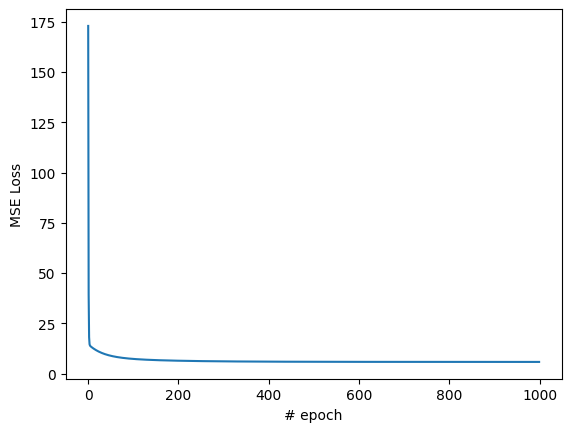

In [55]:
(w1, w2, w3, b, losses) = implement_linear_regression_nsamples(X, y, epoch_max=1000, lr=1e-5)
print(losses)
plt.plot(losses)
plt.xlabel("# epoch")
plt.ylabel("MSE Loss")
plt.show()


In [56]:
#cau 11
print(w1, w2, w3, b, losses)

0.06710990754044266 0.15756173831487585 0.029619799386084403 0.015537523797089711 [172.98395547828923, 39.4081674745134, 18.15746728564735, 14.634633779162357, 13.913880074022757, 13.640049637323427, 13.441395294810789, 13.259118517018994, 13.083802587178743, 12.913826664416215, 12.748804182322559, 12.58854742072041, 12.432904005847659, 12.281730988201284, 12.134890631437667, 11.992249630675893, 11.853678875589457, 11.719053303032835, 11.588251767260099, 11.461156916275085, 11.33765507239911, 11.217636116651946, 11.100993376782949, 10.987623518830578, 10.877426442098113, 10.77030517743778, 10.666165788738784, 10.564917277518695, 10.466471490519933, 10.370743030217112, 10.277649168143096, 10.187109760945374, 10.099047169086274, 10.013386178104167, 9.930053922354574, 9.848979811153313, 9.770095457245784, 9.693334607529332, 9.618633075957472, 9.545928678557278, 9.475161170493593, 9.406272185115144, 9.339205174920476, 9.273905354383018, 9.210319644576826, 9.148396619546123, 9.0880864543638

In [59]:
X, y = prepare_data('advertising.csv')
w1,w2,w3,b,losses = implement_linear_regression(X, y, epoch_max=50, lr=1e-5)

# Print loss value at iteration 9999
print(losses[9999])


31.338878034644296
